# MathTool HW4
2024-11-7

## Question 2

### a)

The poisson distribution as follow:
$$
p(k) = \frac{\mu^k e^{-\mu}}{k!}
$$


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [43]:
# Set parameters
mu = 6
k_values = np.arange(21)

# Compute the Poisson distribution
p_k = (mu ** k_values * np.exp(-mu)) / factorial(k_values)

# Normalize the distribution
p_k /= p_k.sum()

# Calculate the mean
mean_firing_rate = np.sum(k_values * p_k)
mean_firing_rate

np.float64(5.999977649595795)

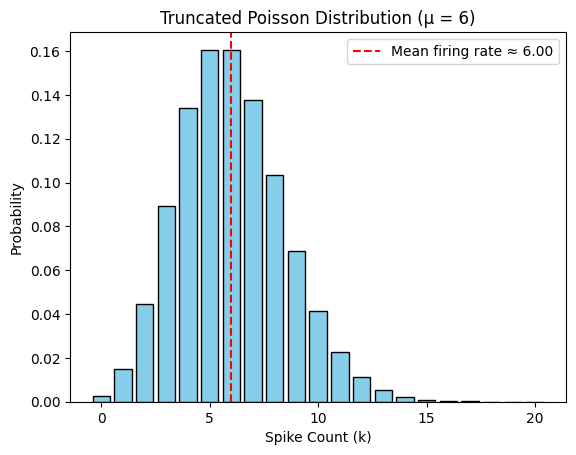

Mean firing rate: 6.00
Is the mean firing rate equal to µ? Yes


In [44]:
plt.bar(k_values, p_k, color='skyblue', edgecolor='black')
plt.xlabel("Spike Count (k)")
plt.ylabel("Probability")
plt.title("Truncated Poisson Distribution (µ = 6)")

plt.axvline(mean_firing_rate, color='red', linestyle='--', label=f"Mean firing rate ≈ {mean_firing_rate:.2f}")
plt.legend()

plt.show()

# Print the mean firing rate for reference
print(f"Mean firing rate: {mean_firing_rate:.2f}")
print(f"Is the mean firing rate equal to µ? {'Yes' if np.isclose(mean_firing_rate, mu) else 'No'}")

In my calculation, it's not exactly equal to 6.0, but it's 5.999....
The calculated mean firing rate may differ slightly from μ=6 because we truncated the Poisson distribution at k=20. In a untruncated Poisson distribution, the mean is exactly 
μ. However, truncation excludes some higher spike counts, which slightly shifts the mean lower than μ. 

### b）


In [45]:
# Generate num samples from a probability distribution by vector p.

def randp(p,num):
    # Compute the cumulative distribution function (CDF) from p
    cdf = np.cumsum(p)
    # Generate num random values between 0 and 1
    random_values = np.random.rand(num)
    # For each random value, find the corresponding sample index
    samples = np.searchsorted(cdf, random_values)
    return samples

In [46]:
# Sample sizes
sample_sizes = [10**2, 10**3, 10**4, 10**5]


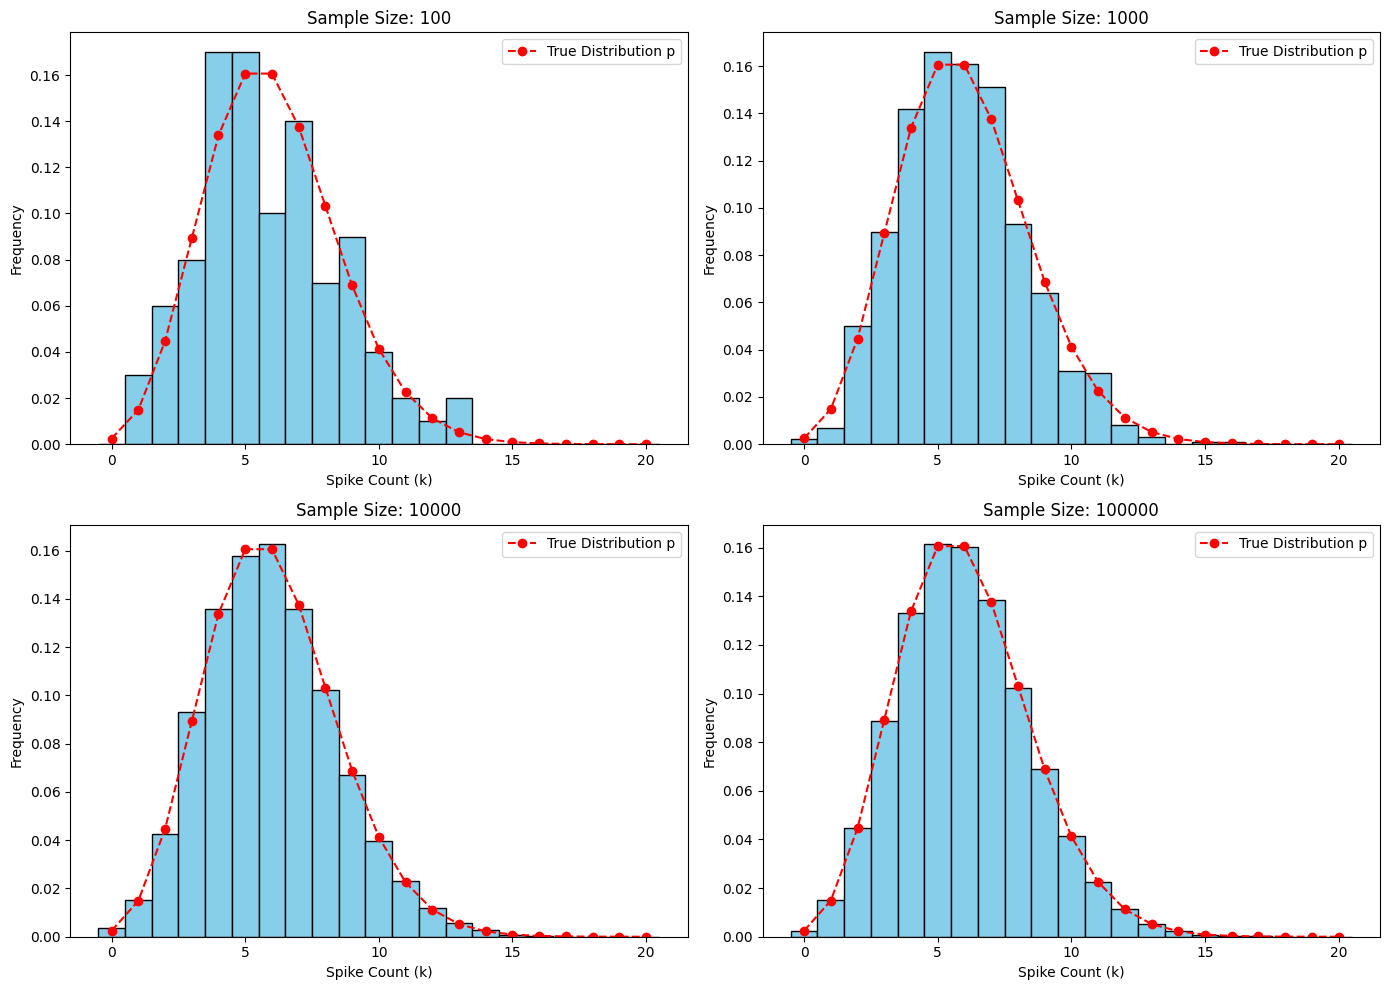

In [47]:
plt.figure(figsize=(14, 10))
for i, num_samples in enumerate(sample_sizes, 1):
    samples = randp(p_k, num_samples)
    
    # Plot histogram of sampled values
    plt.subplot(2, 2, i)
    plt.hist(samples, bins=np.arange(-0.5, 21.5, 1), density=True, color='skyblue', edgecolor='black')
    plt.plot(k_values, p_k, 'r--', marker='o', label="True Distribution p")
    plt.xlabel("Spike Count (k)")
    plt.ylabel("Frequency")
    plt.title(f"Sample Size: {num_samples}")
    plt.legend()

plt.tight_layout()
plt.show()

With smaller sample sizes (e.g., 100), the histogram may have noticeable deviations. As the sample size increases (e.g., 10,000 or 100,000), the histogram should closely match the true distribution, showing convergence.

### c）

In [48]:
mu2 = 3.0

In [49]:
# Poisson for neuron 2
q_k = (mu2 ** k_values * np.exp(-mu2)) / factorial(k_values)
# Normalize
q_k /= q_k.sum() 

In [50]:
# Distribution of sum
combined_distribution = np.convolve(p_k, q_k)

In [51]:
sample_sizes_c = 1000
samples_p = randp(p_k, sample_sizes_c)
samples_q = randp(q_k, sample_sizes_c)
samples_sum = samples_p + samples_q

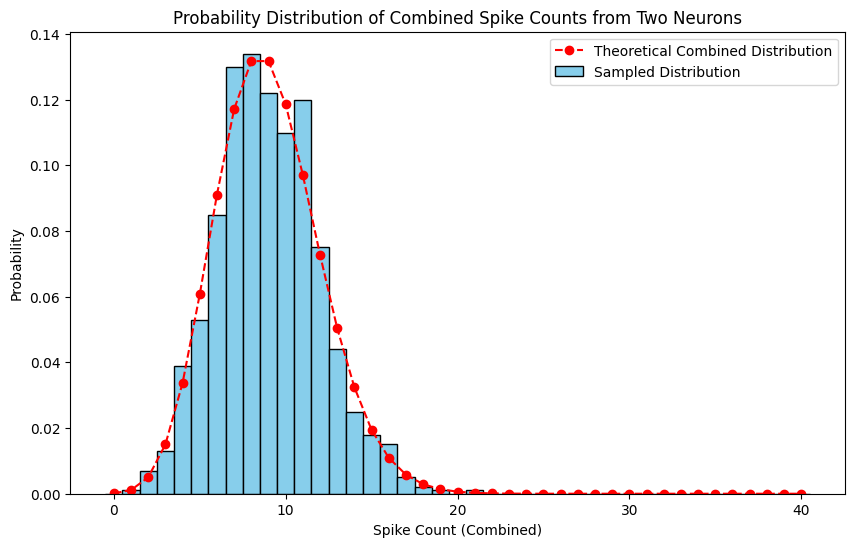

In [52]:
plt.figure(figsize=(10, 6))

#theoritical distribution
plt.plot(np.arange(len(combined_distribution)), combined_distribution, 'r--', marker='o', label="Theoretical Combined Distribution")
plt.hist(samples_sum, bins=np.arange(-0.5, len(combined_distribution)+0.5, 1), density=True, color='skyblue', edgecolor='black', label="Sampled Distribution")

plt.xlabel("Spike Count (Combined)")
plt.ylabel("Probability")
plt.title("Probability Distribution of Combined Spike Counts from Two Neurons")
plt.legend()
plt.show()

The distribution of the observed spike count is a Poisson distribution with a mean of 9.

### d)

In [53]:
mu3 = 9.0
partd= (mu3 ** k_values * np.exp(-mu3)) / factorial(k_values)
partd /= partd.sum()

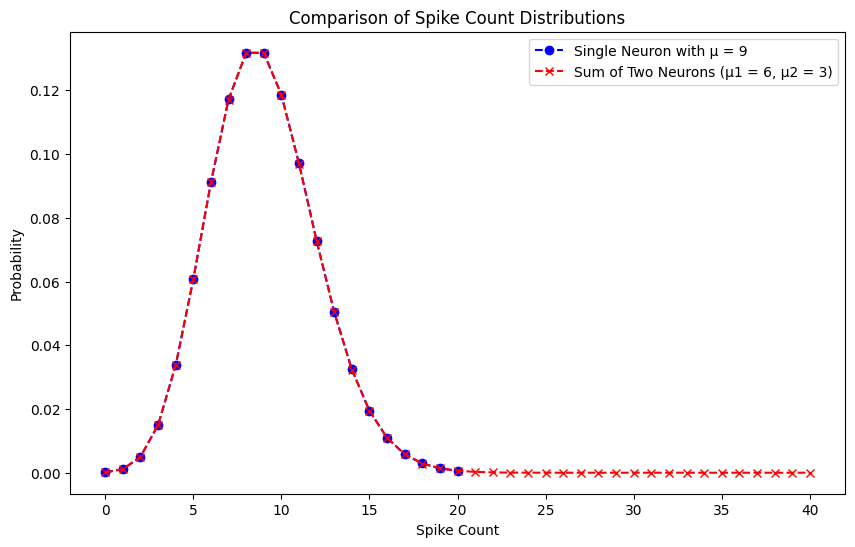

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, partd, 'b--', marker='o', label="Single Neuron with µ = 9")
plt.plot(np.arange(len(combined_distribution)), combined_distribution, 'r--', marker='x', label="Sum of Two Neurons (µ1 = 6, µ2 = 3)")
plt.xlabel("Spike Count")
plt.ylabel("Probability")
plt.title("Comparison of Spike Count Distributions")
plt.legend()
plt.show()

We CANNOT distinguish whether the measured spikes came from one neuron with a mean firing rate of 9 spikes per interval or from two neurons with mean firing rates of 6 and 3 spikes per interval just by looking at the distribution of spike counts.

From the perspective of properties of Poisson distribution, it has an additive property: if two independent Poisson processes with means μ1 and μ2 are summed, the result is also a Poisson process with mean μ = μ1+μ2. This property means that the distribution of spike counts will look identical whether the spikes come from one neuron or the combined activity of two neurons, as long as the total mean rate is the same. 
